# Sistema de Análisis de Riesgos en Alertas Alimentarias: Panadería y Lácteos

## Introducción y Contexto

Este notebook implementa un sistema innovador de análisis y clasificación de riesgos para alertas alimentarias, 
centrado específicamente en productos de panadería y lácteos. A través de algoritmos estructurados y análisis 
estadístico, transformamos miles de alertas de seguridad alimentaria en información estratégica y procesable.

### Contexto y Relevancia
La seguridad alimentaria es un componente crítico de la salud pública global. Con el aumento 
del comercio internacional de alimentos, la complejidad de las cadenas de suministro y la 
creciente conciencia de los consumidores sobre la seguridad de los alimentos, la gestión 
efectiva de riesgos alimentarios se ha convertido en una prioridad para organismos reguladores, 
empresas y consumidores.

Este sistema de análisis de riesgos representa una innovación significativa en cómo se procesan, 
analizan y comunican las alertas alimentarias. Al transformar datos no estructurados de múltiples 
fuentes en información procesable, el sistema permite:

1. **Identificación proactiva de riesgos emergentes**: Detecta patrones antes de que se conviertan en crisis
2. **Toma de decisiones basada en evidencia**: Prioriza recursos de inspección y control
3. **Prevención efectiva**: Reduce la incidencia de retiros de productos y enfermedades transmitidas por alimentos
4. **Comunicación clara**: Facilita la comprensión de riesgos complejos mediante visualizaciones intuitivas

### ¿Por qué es importante este análisis?
- **Protección al consumidor**: Identifica los riesgos más graves para la salud pública
- **Optimización de recursos**: Permite a autoridades y empresas priorizar esfuerzos de control
- **Detección temprana**: Revela patrones geográficos y temporales de riesgos emergentes
- **Toma de decisiones informada**: Proporciona evidencia objetiva para decisiones regulatorias y comerciales

### Valor para Diferentes Stakeholders

Este sistema proporciona valor específico a diferentes grupos de interés:

#### Para Autoridades Reguladoras:
- **Optimización de recursos** al enfocar inspecciones en productos/orígenes de mayor riesgo
- **Justificación objetiva** para establecer controles más rigurosos en categorías específicas
- **Anticipación de riesgos emergentes** antes de que se conviertan en crisis

#### Para Empresas Alimentarias:
- **Decisiones informadas de aprovisionamiento** basadas en perfiles de riesgo por país/producto
- **Programas de control preventivo** enfocados en los peligros más relevantes
- **Reducción de costos por retiros de producto** mediante gestión proactiva

#### Para Consumidores:
- **Mayor transparencia** sobre los riesgos reales en la cadena alimentaria
- **Protección mejorada** gracias a controles más enfocados y efectivos

## Introducción y Justificación

Este notebook implementa un sistema innovador de análisis y clasificación de riesgos para alertas alimentarias, 
centrado específicamente en productos de panadería y lácteos. A través de algoritmos estructurados y análisis 
estadístico, transformamos miles de alertas de seguridad alimentaria en información estratégica y procesable.

### ¿Por qué es importante este análisis?
- **Protección al consumidor**: Identifica los riesgos más graves para la salud pública
- **Optimización de recursos**: Permite a autoridades y empresas priorizar esfuerzos de control
- **Detección temprana**: Revela patrones geográficos y temporales de riesgos emergentes
- **Toma de decisiones informada**: Proporciona evidencia objetiva para decisiones regulatorias y comerciales

Para una documentación detallada sobre la metodología, resultados y recomendaciones, consulte las secciones
al final del notebook.

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import os

# Configuración para mejorar visualización
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (19, 9)
plt.rcParams['font.size'] = 16

## Carga y Exploración de Datos

En esta sección cargamos datos de alertas alimentarias consolidados de múltiples fuentes (FDA, RASFF).
Estos datos representan notificaciones oficiales de problemas de seguridad detectados en productos
de panadería y lácteos a nivel global.

Este dataset integrado es único porque combina información de distintos sistemas regulatorios, 
permitiendo un análisis más completo de los riesgos alimentarios que si utilizáramos una sola fuente.

In [40]:
data_path = os.path.join('data', 'final', 'consolidated_bakery_dairy_alerts.csv')
df = pd.read_csv(data_path)

# Mostrar información básica del dataset
print(f"Dimensiones del dataset: {df.shape}")
print("\nPrimeras 5 filas:")
display(df.head())

print("\nInformación del dataset:")
display(df.info())

print("\nEstadísticas descriptivas:")
display(df.describe(include='all'))

Dimensiones del dataset: (6061, 13)

Primeras 5 filas:


,alert_id,date,product_name,product_type,hazard_type,company,country_origin,country_notification,source_database,source_id,details,original_data,category
0,FDA-1,04/09/2025,Heinen’s - Honey Roasted Peanuts,"Food & Beverages, Allergens, Nuts & Nut Products",NaN,NaN,United States,United States,FDA,FDA-1,NaN,"{""Date"":""04\/09\/2025"",""Brand Name(s)"":""Heinen...",sugar
1,FDA-9,04/09/2025,Heinen’s - Honey Roasted Peanuts,"Food & Beverages, Allergens, Nuts & Nut Products",NaN,NaN,United States,United States,FDA,FDA-9,NaN,"{""Date"":""04\/09\/2025"",""Brand Name(s)"":""Heinen...",sugar
2,RASFF-2025.2543,04/04/2025,Too high content of coumarin in biscuits from ...,cereals and bakery products,coumarin too high content,"Estonia,Spain",Spain,Estonia,RASFF,2025.2543,Classification: information notification for f...,"{'reference': 2025.2543, 'category': 'cereals ...",bakery
3,RASFF-2025.252,04/04/2025,Chemical taste and strong smell from ice cream,milk and milk products,NaN,"Ireland,Northern Ireland",Ireland,Ireland,RASFF,2025.252,Classification: information notification for f...,"{'reference': 2025.252, 'category': 'milk and ...",dairy
4,RASFF-2025.2532,04/04/2025,Increased cadmium content in psyllium husks fr...,cereals and bakery products,cadmium,"Belgium,Germany","Canada,Germany",Germany,RASFF,2025.2532,Classification: information notification for f...,"{'reference': 2025.2532, 'category': 'cereals ...",bakery



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   alert_id              6061 non-null   object
 1   date                  6061 non-null   object
 2   product_name          6061 non-null   object
 3   product_type          6061 non-null   object
 4   hazard_type           4649 non-null   object
 5   company               5562 non-null   object
 6   country_origin        5960 non-null   object
 7   country_notification  6061 non-null   object
 8   source_database       6061 non-null   object
 9   source_id             6061 non-null   object
 10  details               5574 non-null   object
 11  original_data         6061 non-null   object
 12  category              6061 non-null   object
dtypes: object(13)
memory usage: 615.7+ KB


None


Estadísticas descriptivas:


,alert_id,date,product_name,product_type,hazard_type,company,country_origin,country_notification,source_database,source_id,details,original_data,category
count,6061,6061,6061,6061,4649,5562,5960,6061,6061,6061,5574,6061,6061
unique,6061,1347,4666,51,702,1466,281,33,2,6061,2111,5886,6
top,FDA-957,12/23/2020,ethylene oxide in sesame seeds,"nuts, nut products and seeds","Aflatoxin B1 ,aflatoxin total","India,Netherlands",United States,Netherlands,RASFF,FDA-957,Classification: border rejection notification ...,"{""Date"":""12\/15\/2023"",""Brand Name(s)"":""Quaker...",grains
freq,1,21,133,2890,906,182,908,1322,5574,1,1659,3,2821


In [41]:
# Función para extraer el año de diferentes formatos de fecha
def extract_year(date_str):
    if pd.isna(date_str):
        return None
    
    # Intentar encontrar un patrón de año (4 dígitos que comienzan con 19 o 20)
    match = re.search(r'\b(19|20)\d{2}\b', str(date_str))
    if match:
        return match.group(0)
    return None

# Aplicar la función para crear una columna de año
df['year'] = df['date'].apply(extract_year)

# Verificar valores únicos en columnas clave
print("\nValores únicos en product_type:", df['product_type'].nunique())
print("Valores únicos en hazard_type:", df['hazard_type'].nunique())
print("Valores únicos en category:", df['category'].nunique())
print("Distribución por año:")
display(df['year'].value_counts().sort_index())


Valores únicos en product_type: 51
Valores únicos en hazard_type: 702
Valores únicos en category: 6
Distribución por año:


year
2018       3
2019      17
2020    1061
2021     900
2022    1025
2023    1260
2024    1452
2025     343
Name: count, dtype: int64

## Sistema de Clasificación de Riesgos

La siguiente sección implementa nuestra metodología estructurada para evaluar y clasificar riesgos.
La metodología se basa en principios establecidos del análisis de riesgos (FAO/OMS, Codex Alimentarius),
adaptados para el procesamiento automatizado de grandes volúmenes de datos.

Nuestro enfoque combina:
1. Evaluación de severidad basada en el impacto potencial en la salud
2. Evaluación de probabilidad considerando patrones históricos por origen y tipo de producto
3. Matriz de riesgo que combina ambas dimensiones para una clasificación objetiva

Este sistema supera las limitaciones de los métodos tradicionales al proporcionar evaluaciones
consistentes, reproducibles y escalables para miles de alertas.

In [42]:
# Funciones para clasificar severidad y probabilidad

def clasificar_severidad(hazard_type):
    """
    Clasifica la severidad del riesgo en escala 1-4 basado en el tipo de peligro.
    1: Menor - Sin lesión o enfermedad
    2: Moderada - Lesión o enfermedad leve
    3: Seria - Lesión o enfermedad, sin incapacidad permanente
    4: Muy seria - Incapacidad permanente o pérdida de vida
    """
    if pd.isna(hazard_type):
        return 1  # Desconocido se clasifica como menor por defecto
    
    hazard_lower = str(hazard_type).lower()
    
    # Peligros muy serios (4)
    if any(term in hazard_lower for term in [
        'listeria', 'salmonella', 'e. coli', 'escherichia coli', 'botulinum', 
        'aflatoxin', 'mercury', 'lead', 'cadmium', 'foreign body', 'metal', 
        'pieces', 'glass', 'cronobacter'
    ]):
        return 4
    
    # Peligros serios (3)
    elif any(term in hazard_lower for term in [
        'undeclared allergen', 'undeclared milk', 'undeclared peanut', 
        'undeclared soy', 'undeclared wheat', 'undeclared egg', 
        'undeclared nut', 'undeclared tree', 'pesticide', 'unauthorised substance',
        'moulds', 'high content', 'ethylene oxide'
    ]):
        return 3
    
    # Peligros moderados (2)
    elif any(term in hazard_lower for term in [
        'labelling', 'organoleptic', 'traces', 
        'too high count', 'presence', 'migration'
    ]):
        return 2
    
    # Por defecto
    else:
        return 1

def calcular_frecuencia_origen(df):
    """Calcula la frecuencia de aparición de cada país de origen"""
    return df['country_origin'].value_counts().to_dict()

def calcular_frecuencia_producto(df):
    """Calcula la frecuencia de aparición de cada tipo de producto"""
    return df['product_type'].value_counts().to_dict()

def clasificar_probabilidad(row, freq_origen, freq_producto):
    """
    Clasifica la probabilidad de ocurrencia en escala 1-4 basado en frecuencias.
    1: Remota - Menos de 1 vez cada 5 años
    2: Ocasional - No más de 1 vez cada 2 años
    3: Probable - No más de 1 vez cada 6 meses
    4: Frecuente - 2 o más veces cada 6 meses
    """
    origen = row['country_origin'] if not pd.isna(row['country_origin']) else "Desconocido"
    producto = row['product_type'] if not pd.isna(row['product_type']) else "Desconocido"
    
    # Obtener frecuencias
    freq_orig = freq_origen.get(origen, 0)
    freq_prod = freq_producto.get(producto, 0)
    
    # Normalizar frecuencias
    max_orig = max(freq_origen.values()) if freq_origen else 1
    max_prod = max(freq_producto.values()) if freq_producto else 1
    
    score_orig = freq_orig / max_orig if max_orig > 0 else 0
    score_prod = freq_prod / max_prod if max_prod > 0 else 0
    
    # Combinar scores (60% origen, 40% producto)
    combined_score = (score_orig * 0.6) + (score_prod * 0.4)
    
    # Clasificar
    if combined_score > 0.75:
        return 4  # Frecuente
    elif combined_score > 0.5:
        return 3  # Probable
    elif combined_score > 0.25:
        return 2  # Ocasional
    else:
        return 1  # Remota

# Calcular frecuencias
freq_origen = calcular_frecuencia_origen(df)
freq_producto = calcular_frecuencia_producto(df)

# Aplicar clasificaciones
df['severidad_num'] = df['hazard_type'].apply(clasificar_severidad)
df['probabilidad_num'] = df.apply(lambda row: clasificar_probabilidad(row, freq_origen, freq_producto), axis=1)

# Crear etiquetas categóricas para severidad y probabilidad
severidad_labels = {
    1: 'Menor',
    2: 'Moderada',
    3: 'Seria',
    4: 'Muy seria'
}

probabilidad_labels = {
    1: 'Remota',
    2: 'Ocasional',
    3: 'Probable',
    4: 'Frecuente'
}

df['severidad'] = df['severidad_num'].map(severidad_labels)
df['probabilidad'] = df['probabilidad_num'].map(probabilidad_labels)

# Calcular nivel de riesgo
df['nivel_riesgo_num'] = df['severidad_num'] * df['probabilidad_num']

# Clasificar nivel de riesgo
def clasificar_nivel_riesgo(nivel):
    if nivel <= 4:
        return 'Bajo'
    elif nivel <= 8:
        return 'Moderado'
    else:
        return 'Alto'

df['nivel_riesgo'] = df['nivel_riesgo_num'].apply(clasificar_nivel_riesgo)

# Mostrar distribución de clasificación
print("\nDistribución de Severidad:")
display(df['severidad'].value_counts())

print("\nDistribución de Probabilidad:")
display(df['probabilidad'].value_counts())

print("\nDistribución de Nivel de Riesgo:")
display(df['nivel_riesgo'].value_counts())


Distribución de Severidad:


severidad
Muy seria    2493
Menor        2374
Seria        1134
Moderada       60
Name: count, dtype: int64


Distribución de Probabilidad:


probabilidad
Ocasional    2101
Probable     1714
Remota       1366
Frecuente     880
Name: count, dtype: int64


Distribución de Nivel de Riesgo:


nivel_riesgo
Bajo        2882
Alto        2055
Moderado    1124
Name: count, dtype: int64

## Visualizaciones Estratégicas

Las siguientes visualizaciones están diseñadas para transformar datos complejos en información
accionable para diferentes stakeholders. Cada gráfico responde a preguntas clave para la
gestión de riesgos alimentarios:

- **Matrices de riesgo**: ¿Dónde se concentran las alertas en términos de severidad y probabilidad?
- **Distribución por categoría**: ¿Qué tipos de productos presentan mayores riesgos?
- **Análisis temporal**: ¿Cómo evolucionan los riesgos a lo largo del tiempo?
- **Distribución geográfica**: ¿Qué países de origen requieren mayor atención?

Estas visualizaciones proporcionan la base para decisiones estratégicas en inspección, control,
aprovisionamiento y gestión de la calidad.

### 1. Matriz de Riesgo (Heatmap)


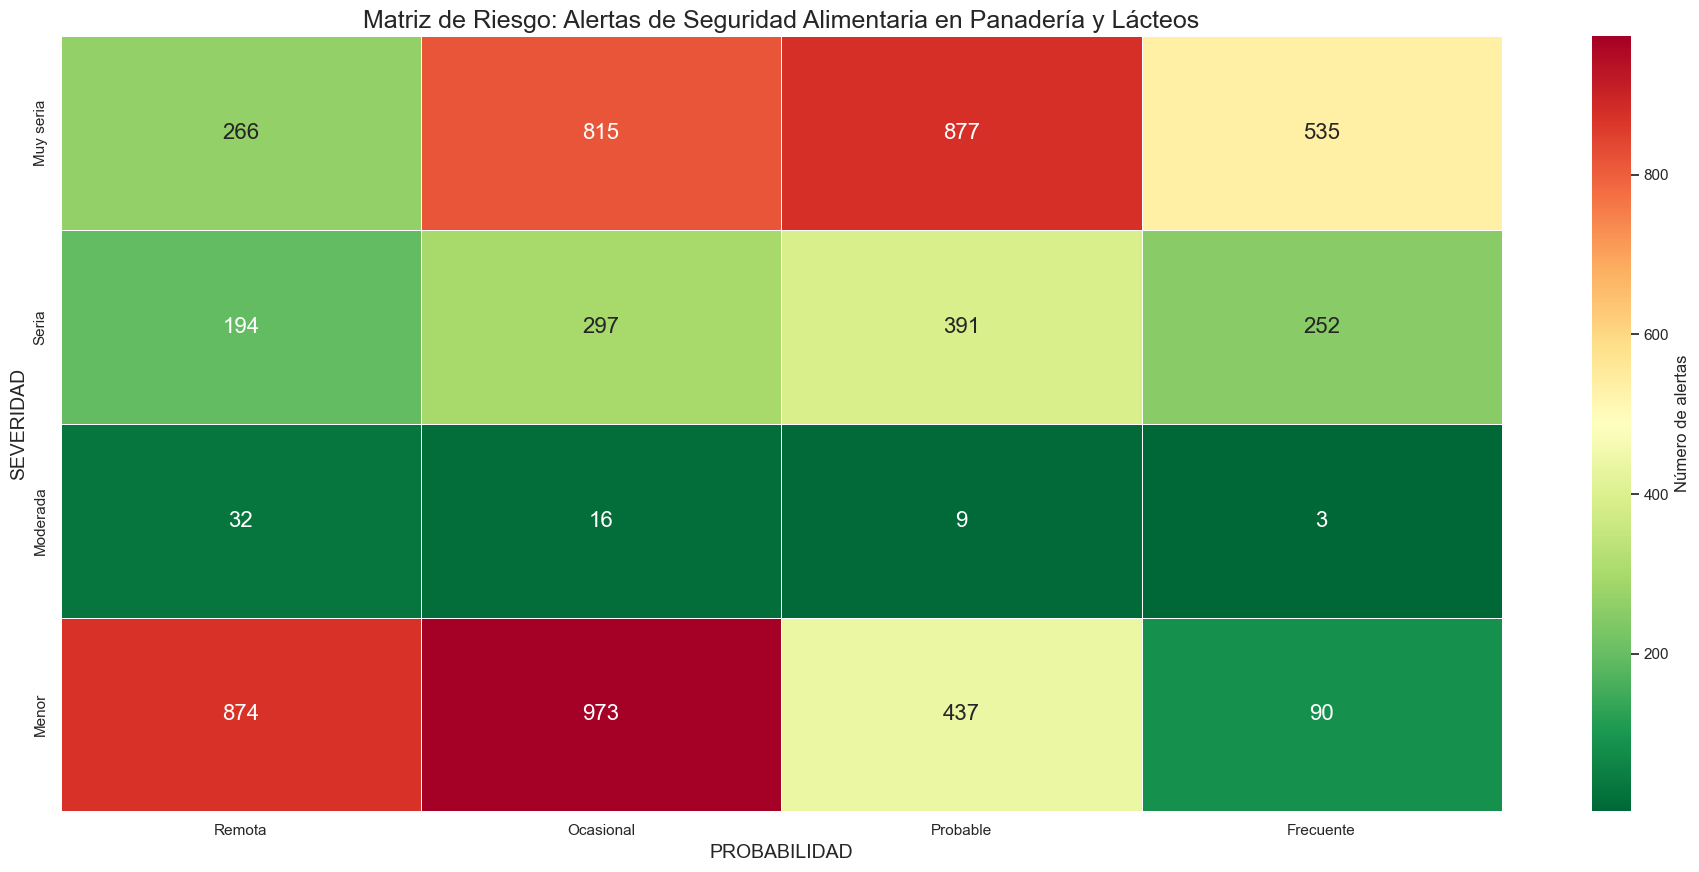

In [43]:
# 1. Matriz de Riesgo (Heatmap)

# Crear matriz de riesgo para conteo
matriz_riesgo = pd.crosstab(
    df['severidad_num'], 
    df['probabilidad_num'],
    values=df['alert_id'], 
    aggfunc='count'
).fillna(0).astype(int)

# Ordenar filas y columnas de mayor a menor severidad/probabilidad
matriz_riesgo = matriz_riesgo.sort_index(ascending=False)
matriz_riesgo = matriz_riesgo[sorted(matriz_riesgo.columns)]

# Visualizar matriz de riesgo
plt.figure(figsize=(19, 9))
ax = sns.heatmap(matriz_riesgo, annot=True, cmap='RdYlGn_r', fmt='d', 
                 linewidths=.5, cbar_kws={'label': 'Número de alertas'})

# Reemplazar etiquetas numéricas por texto
ax.set_yticklabels([severidad_labels[i] for i in sorted(severidad_labels.keys(), reverse=True)])
ax.set_xticklabels([probabilidad_labels[i] for i in sorted(probabilidad_labels.keys())])

plt.title('Matriz de Riesgo: Alertas de Seguridad Alimentaria en Panadería y Lácteos', fontsize=18)
plt.ylabel('SEVERIDAD', fontsize=14)
plt.xlabel('PROBABILIDAD', fontsize=14)
plt.tight_layout()
plt.show()

#### Elementos clave:
- **Eje Y (vertical)**: Severidad del peligro (de menor a muy seria)
- **Eje X (horizontal)**: Probabilidad de ocurrencia (de remota a frecuente)
- **Valores en celdas**: Número de alertas en cada combinación
- **Escala de color**: Intensidad de color indica mayor concentración de alertas

#### Cómo interpretar:
- **Densidad de alertas**: Identifique dónde se concentra el mayor número de casos
- **Distribución de severidad**: Observe la distribución vertical para entender qué tan graves son típicamente las alertas
- **Patrones de probabilidad**: Analice la distribución horizontal para determinar la frecuencia típica de ocurrencia
- **Puntos calientes**: Las celdas con valores más altos representan las combinaciones de riesgo más comunes

#### Valor estratégico:
- Permite identificar rápidamente qué combinaciones de severidad-probabilidad dominan el panorama de alertas
- Facilita la priorización de recursos hacia las áreas con mayor concentración de riesgo
- Proporciona una visión global de la distribución de riesgos en una sola visualización

### 2. Matriz de Riesgo Coloreada por Nivel

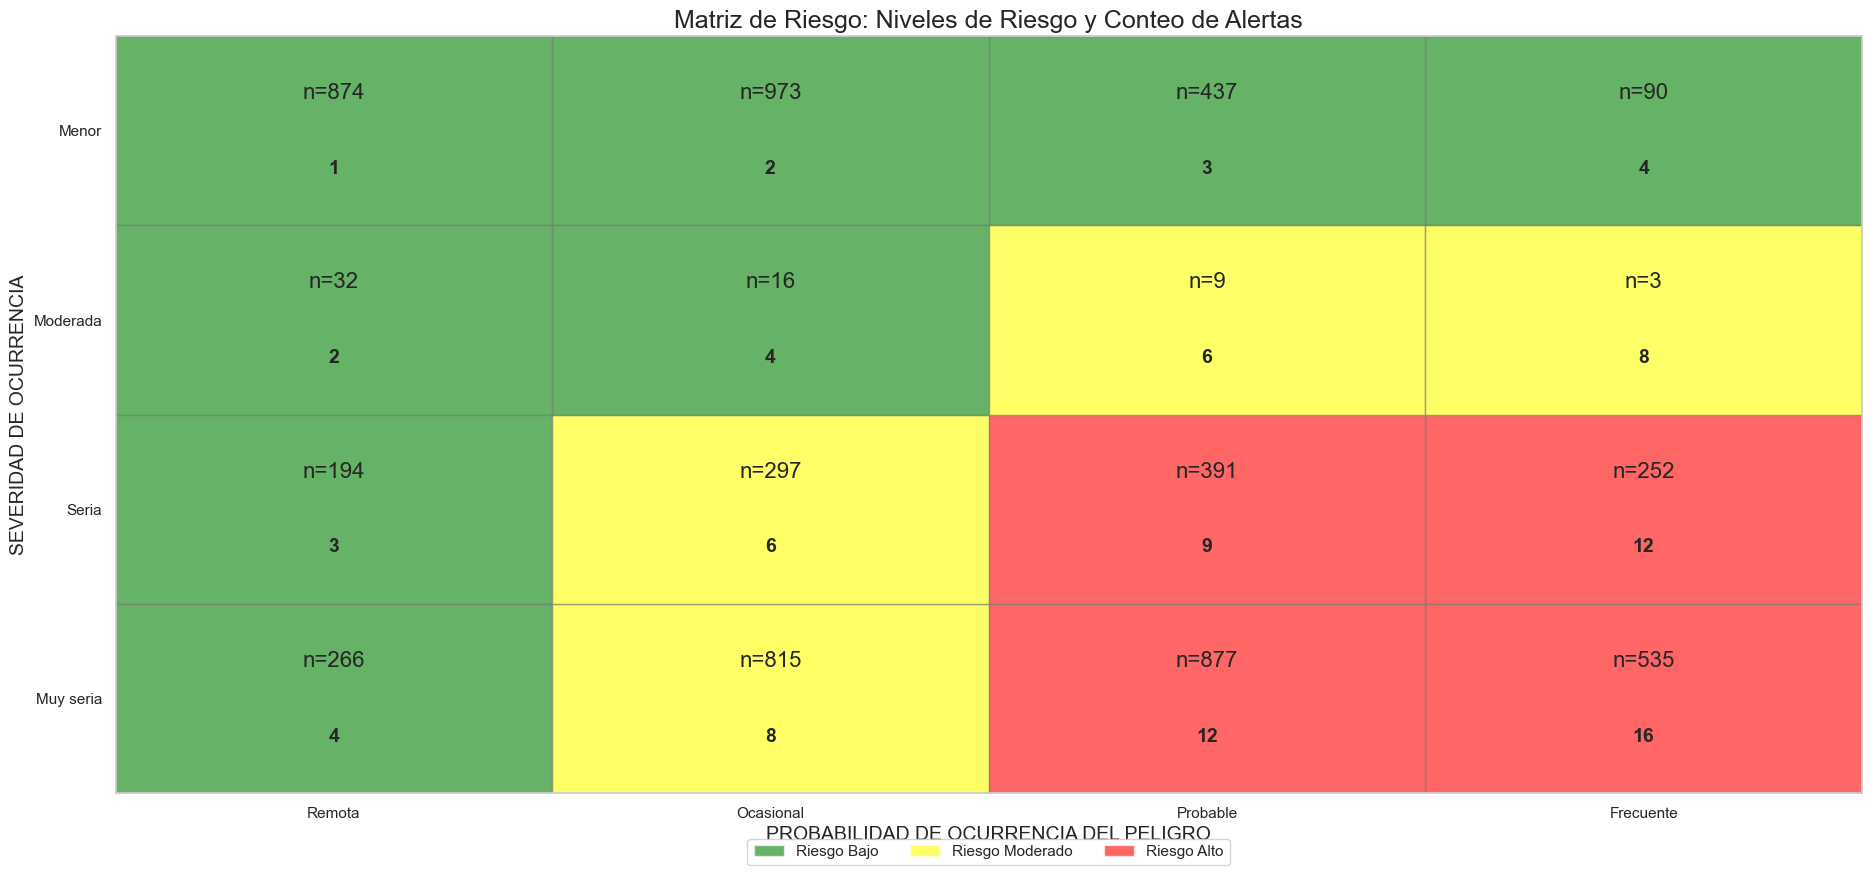

In [44]:
# 2. Matriz de Riesgo Coloreada por Nivel

# Definir colores para niveles de riesgo
def get_risk_color(sev, prob):
    risk = sev * prob
    if risk <= 4:
        return 'green'  # Bajo
    elif risk <= 8:
        return 'yellow'  # Moderado
    else:
        return 'red'  # Alto

# Crear figura para la matriz coloreada
plt.figure(figsize=(19, 9))
ax = plt.subplot(111)

# Tamaño de la matriz
size = 4
cell_width = 1.0
cell_height = 1.0

# Dibujar celdas con colores y texto
for i in range(1, size+1):
    for j in range(1, size+1):
        # Severidad i, Probabilidad j
        # Nota: invertimos i para que la severidad más alta (4) esté arriba
        sev = size - i + 1
        prob = j
        
        # Contar alertas en esta celda
        count = matriz_riesgo.iloc[i-1, j-1] if i-1 < len(matriz_riesgo) and j-1 < len(matriz_riesgo.columns) else 0
        
        # Color basado en nivel de riesgo
        color = get_risk_color(sev, prob)
        
        # Dibujar rectángulo
        rect = plt.Rectangle((j-1, i-1), cell_width, cell_height, 
                            facecolor=color, alpha=0.6, edgecolor='gray')
        ax.add_patch(rect)
        
        # Añadir valor numérico (nivel de riesgo y conteo)
        risk_value = sev * prob
        plt.text(j-0.5, i-0.7, str(risk_value), 
                 horizontalalignment='center', 
                 verticalalignment='center',
                 fontsize=14, fontweight='bold')
        
        # Añadir conteo
        plt.text(j-0.5, i-0.3, f"n={count}", 
                 horizontalalignment='center', 
                 verticalalignment='center')

# Configurar ejes
plt.xlim(0, size)
plt.ylim(0, size)
plt.xticks([i+0.5 for i in range(size)], [probabilidad_labels[i+1] for i in range(size)])
plt.yticks([i+0.5 for i in range(size)], [severidad_labels[size-i] for i in range(size)])

# Etiquetas y título
plt.title('Matriz de Riesgo: Niveles de Riesgo y Conteo de Alertas', fontsize=18)
plt.xlabel('PROBABILIDAD DE OCURRENCIA DEL PELIGRO', fontsize=14)
plt.ylabel('SEVERIDAD DE OCURRENCIA', fontsize=14)

# Añadir leyenda de colores
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', alpha=0.6, label='Riesgo Bajo'),
    Patch(facecolor='yellow', alpha=0.6, label='Riesgo Moderado'),
    Patch(facecolor='red', alpha=0.6, label='Riesgo Alto')
]
plt.legend(handles=legend_elements, loc='upper center', 
           bbox_to_anchor=(0.5, -0.05), ncol=3)

plt.tight_layout()
plt.grid(False)
plt.show()

#### Elementos clave:
- **Colores**: Verde (bajo riesgo), Amarillo (riesgo moderado), Rojo (alto riesgo)
- **Número principal**: Nivel de riesgo numérico (producto de severidad × probabilidad)
- **Valor "n="**: Conteo de alertas en cada celda

#### Cómo interpretar:
- **Distribución por nivel de riesgo**: Observe la proporción de celdas rojas, amarillas y verdes para entender la distribución general de riesgos
- **Zonas críticas**: Identifique las celdas rojas con valores "n" altos, que representan concentraciones de alertas de alto riesgo
- **Relación severidad-probabilidad**: Analice cómo el nivel de riesgo cambia a medida que se mueve por la matriz

#### Valor estratégico:
- Clasifica visualmente las alertas en tres niveles de riesgo claramente diferenciados
- Permite comunicar eficazmente prioridades de riesgo a stakeholders con diferentes niveles de experiencia técnica
- Facilita la identificación de umbrales para intervención y monitoreo

## 3. Evolución Anual de Alertas por Categoría

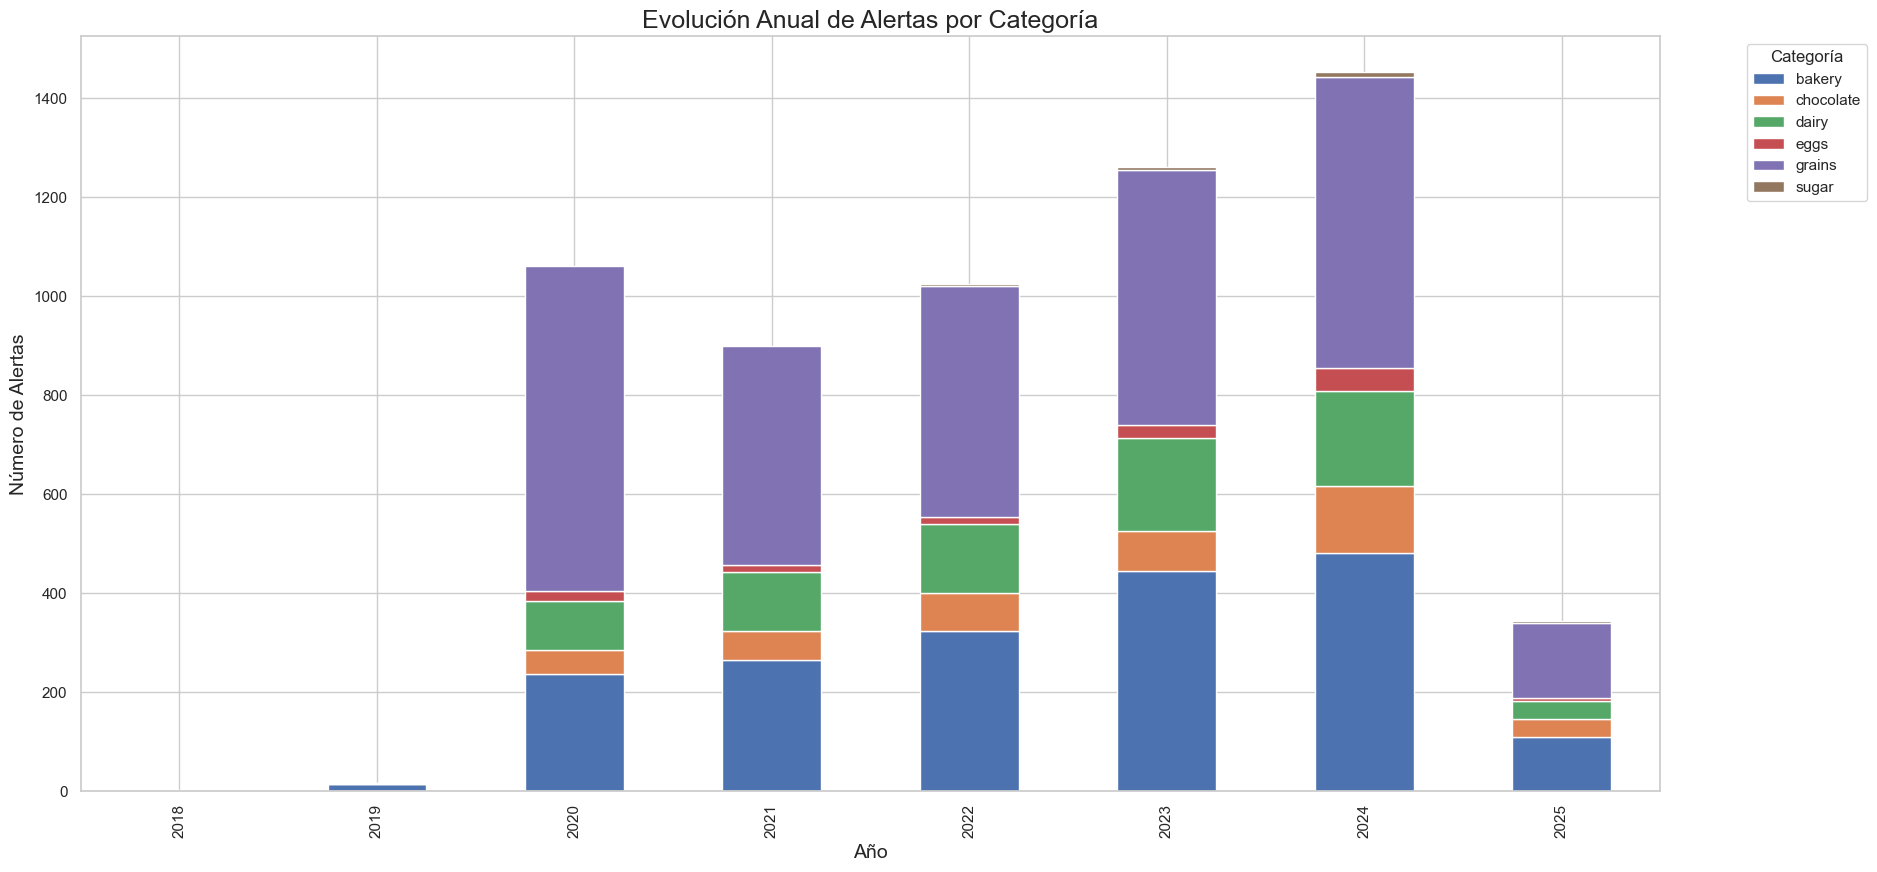

In [45]:
# 3. Distribución de Categorías por Año

# Filtrar para tener solo años válidos y categorías no nulas
df_year_cat = df[df['year'].notna() & df['category'].notna()].copy()

# Crear tabla cruzada de año por categoría
year_cat_counts = pd.crosstab(df_year_cat['year'], df_year_cat['category'])

# Visualizar
plt.figure(figsize=(19, 9))
year_cat_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Evolución Anual de Alertas por Categoría', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Alertas', fontsize=14)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Elementos clave:
- **Eje X**: Años (2018-2025)
- **Eje Y**: Número de alertas
- **Colores en barras**: Diferentes categorías de productos (panadería, lácteos, granos, etc.)
- **Barras apiladas**: Representan el total de alertas por año, desglosadas por categoría

### Cómo interpretar:
- **Tendencia general**: Observe si el número total de alertas aumenta, disminuye o fluctúa a lo largo del tiempo
- **Cambios por categoría**: Identifique qué categorías muestran los mayores cambios entre años
- **Composición relativa**: Analice cómo cambia la proporción de cada categoría respecto al total
- **Puntos de inflexión**: Busque años donde ocurren cambios significativos en el patrón

### Valor estratégico:
- Revela tendencias temporales que pueden correlacionarse con cambios regulatorios, comerciales o de producción
- Identifica categorías emergentes o en declive en términos de problemática de seguridad alimentaria
- Proporciona contexto histórico para entender la evolución de los riesgos


## 4. Top 10 Países de Origen con Alertas de Alta Severidad

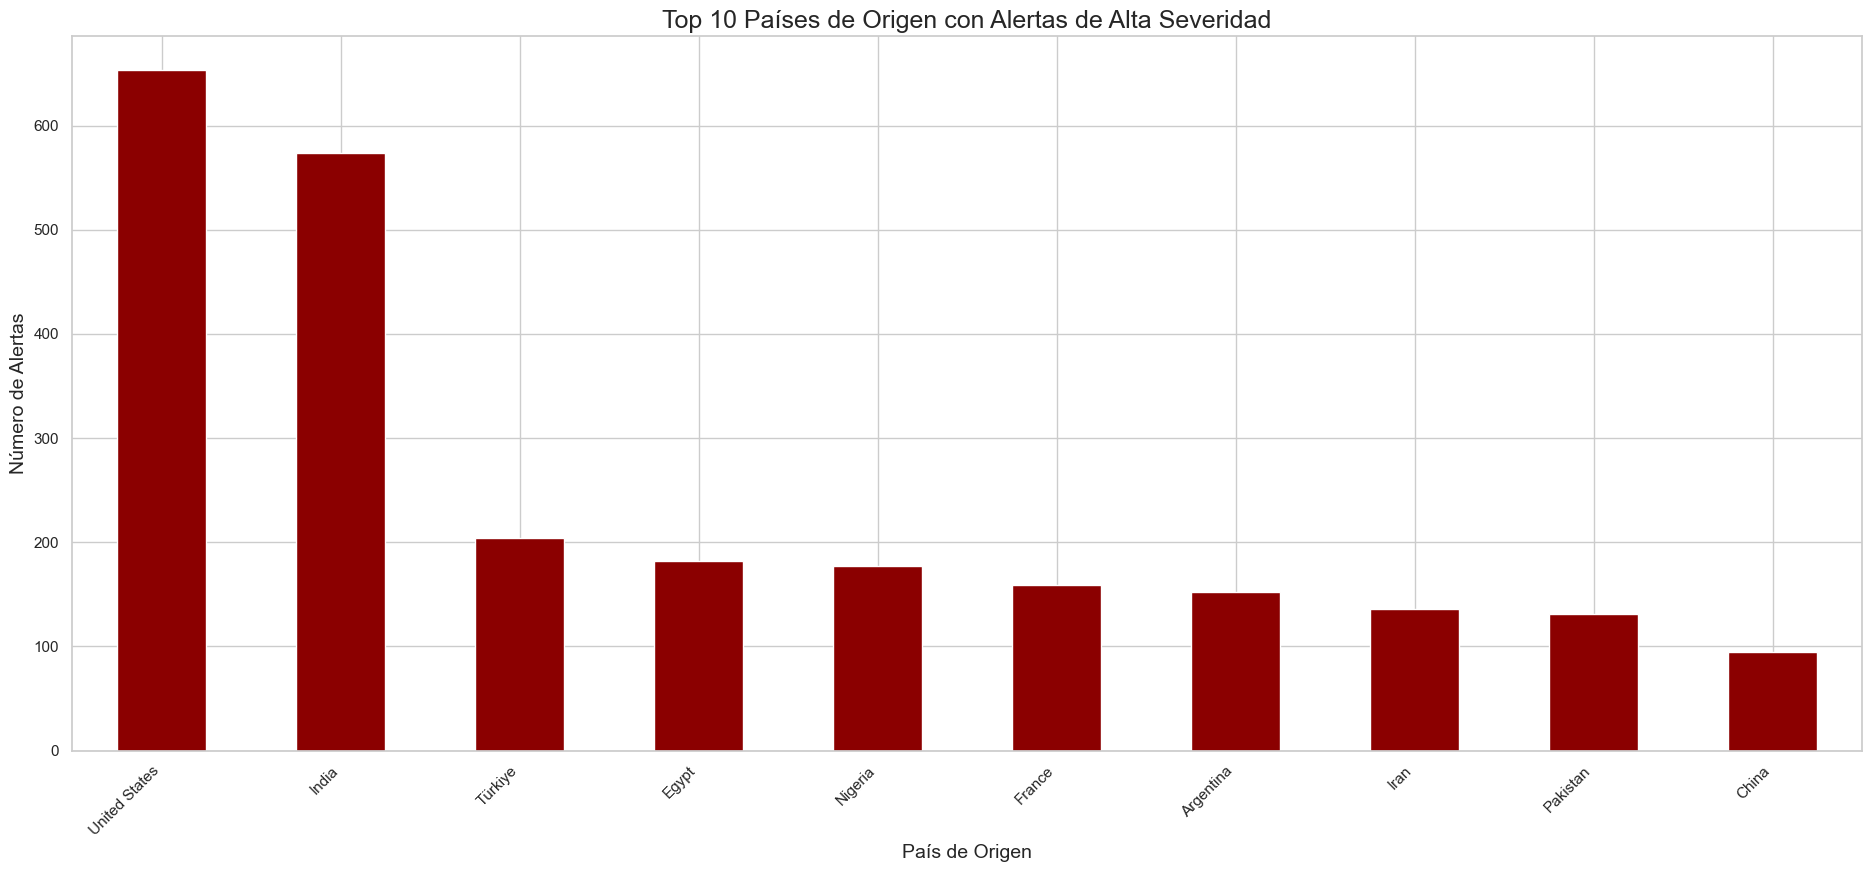

In [46]:
# 4. Top 10 Países de Origen con Alertas de Alta Severidad

# Filtrar alertas de alta severidad (3 y 4)
df_alta_sev = df[df['severidad_num'] >= 3].copy()

# Contar por país de origen
paises_alta_sev = df_alta_sev['country_origin'].value_counts().head(10)

plt.figure(figsize=(19, 9))
paises_alta_sev.plot(kind='bar', color='darkred')
plt.title('Top 10 Países de Origen con Alertas de Alta Severidad', fontsize=18)
plt.xlabel('País de Origen', fontsize=14)
plt.ylabel('Número de Alertas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Elementos clave:
- **Eje X**: Países de origen
- **Eje Y**: Número de alertas de alta severidad
- **Barras**: Representan el volumen de alertas serias o muy serias por país

### Cómo interpretar:
- **Concentración geográfica**: Identifique los países que contribuyen desproporcionadamente a las alertas de alta severidad
- **Diferencias de magnitud**: Compare las alturas relativas de las barras para entender la escala de diferencia entre países
- **Patrones regionales**: Busque si hay clusters de países de regiones similares

### Valor estratégico:
- Permite enfocar los esfuerzos de control e inspección en los países de mayor riesgo
- Informa decisiones de aprovisionamiento y selección de proveedores
- Identifica potenciales necesidades de cooperación internacional o asistencia técnica

## 5. Distribución de Nivel de Riesgo por Categoría

In [47]:
# 5. Principal Peligro por Categoría

# Función para obtener el principal peligro por categoría
def get_top_hazard(group):
    # Filtrar valores nulos
    hazards = group['hazard_type'].dropna().value_counts()
    if len(hazards) > 0:
        return hazards.index[0]
    return "Sin datos"

# Agrupar por categoría y encontrar el principal peligro
top_hazards = df.groupby('category').apply(get_top_hazard).reset_index()
top_hazards.columns = ['Categoría', 'Principal Peligro']

print("\nPrincipal peligro por categoría:")
display(top_hazards)



Principal peligro por categoría:


C:\Users\pedro\AppData\Local\Temp\ipykernel_66192\3966771094.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_hazards = df.groupby('category').apply(get_top_hazard).reset_index()


,Categoría,Principal Peligro
0,bakery,ochratoxin A
1,chocolate,pyrrolizidine alkaloids
2,dairy,Listeria monocytogenes
3,eggs,Salmonella Enteritidis
4,grains,"Aflatoxin B1 ,aflatoxin total"
5,sugar,Product contains undeclared Metformin and Glyb...


### Elementos clave:
- **Eje X**: Categorías de producto
- **Eje Y**: Número de alertas
- **Colores en barras**: Niveles de riesgo (Alto, Moderado, Bajo)
- **Barras apiladas**: Representan el total de alertas por categoría, desglosadas por nivel de riesgo

### Cómo interpretar:
- **Volumen total**: Compare el tamaño total de las barras para identificar las categorías con más alertas
- **Composición de riesgo**: Observe la proporción de alertas de alto, moderado y bajo riesgo en cada categoría
- **Categorías críticas**: Identifique las categorías con mayor proporción de riesgo alto

### Valor estratégico:
- Permite priorizar categorías para inspección y control basado tanto en volumen como en nivel de riesgo
- Identifica qué categorías requieren protocolos más estrictos de gestión de riesgos
- Facilita la asignación eficiente de recursos técnicos y humanos

## 6. Evolución Anual de Alertas por Nivel de Riesgo

<Figure size 1900x900 with 0 Axes>

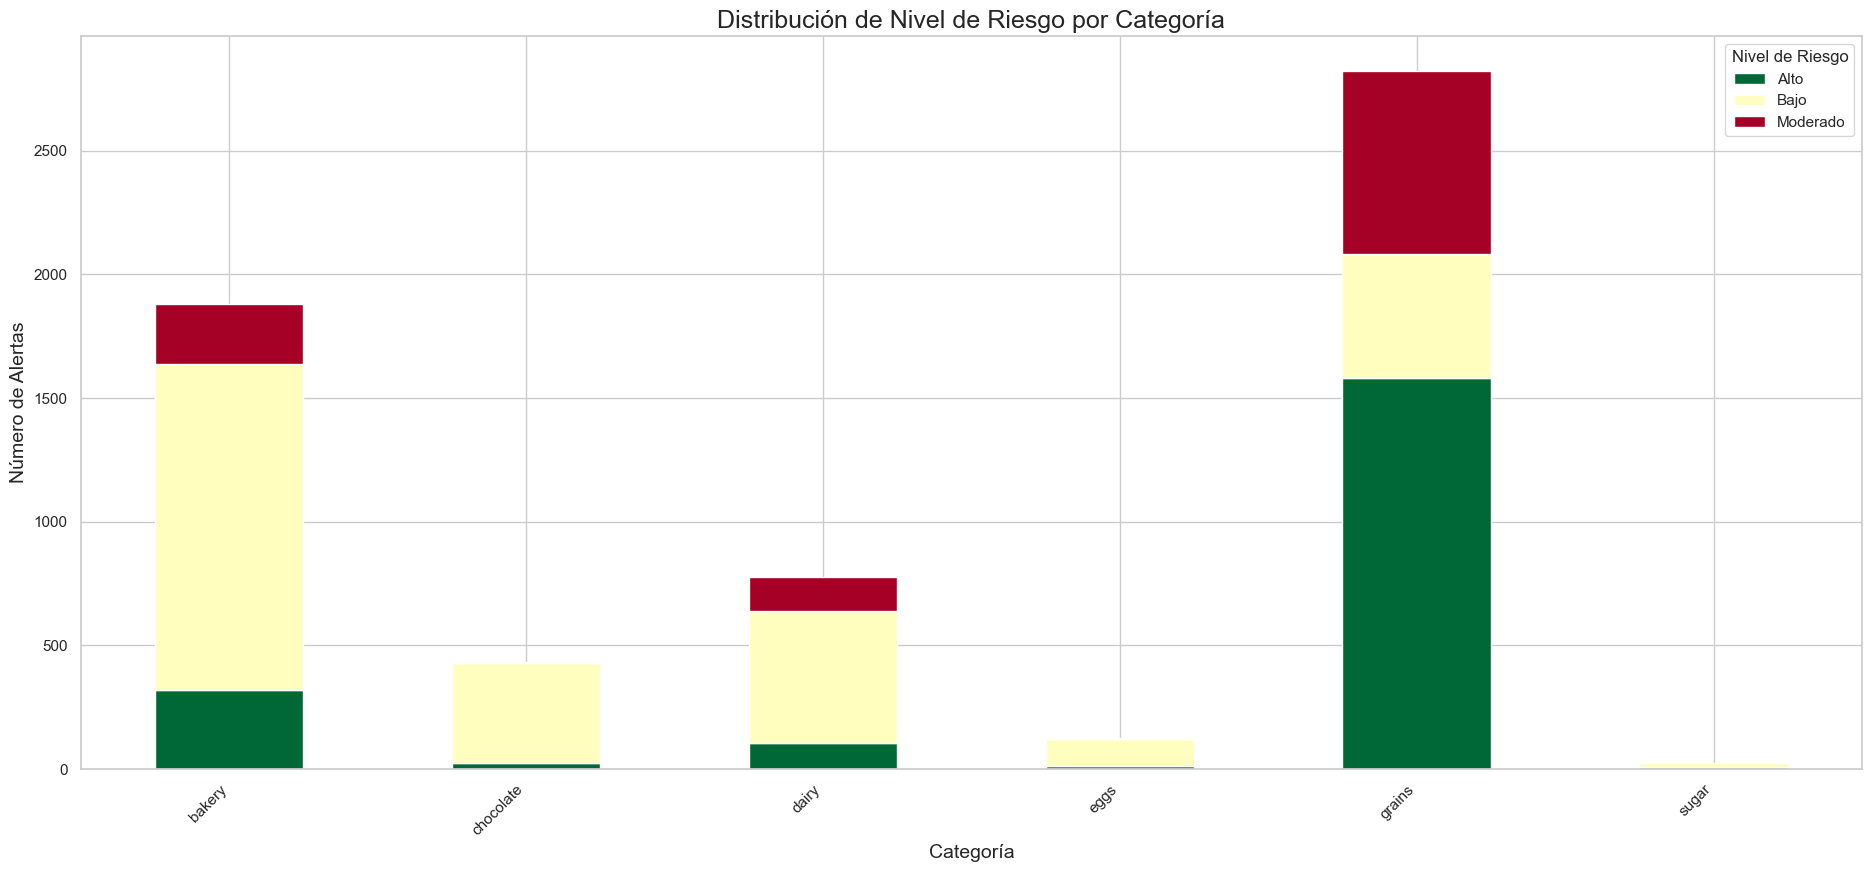

In [48]:
# 6. Distribución de Nivel de Riesgo por Categoría
risk_by_category = pd.crosstab(df['category'], df['nivel_riesgo'])

plt.figure(figsize=(19, 9))
risk_by_category.plot(kind='bar', stacked=True, 
                     colormap='RdYlGn_r')
plt.title('Distribución de Nivel de Riesgo por Categoría', fontsize=18)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Número de Alertas', fontsize=14)
plt.legend(title='Nivel de Riesgo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Elementos clave:
- **Eje X**: Años (2018-2025)
- **Eje Y**: Número de alertas
- **Líneas de colores**: Representan los diferentes niveles de riesgo (Alto, Moderado, Bajo)
- **Marcadores**: Puntos de datos específicos para cada año

### Cómo interpretar:
- **Tendencias por nivel**: Observe cómo evoluciona cada nivel de riesgo independientemente
- **Divergencias y convergencias**: Identifique momentos donde las tendencias se separan o se juntan
- **Pendientes**: Analice la rapidez de los cambios (pendientes pronunciadas indican cambios rápidos)
- **Proyección**: Considere la dirección futura basada en las tendencias recientes

### Valor estratégico:
- Permite evaluar la efectividad de medidas regulatorias o de control implementadas en años específicos
- Identifica si los riesgos están aumentando o disminuyendo en términos generales
- Proporciona base para proyecciones y planificación futura

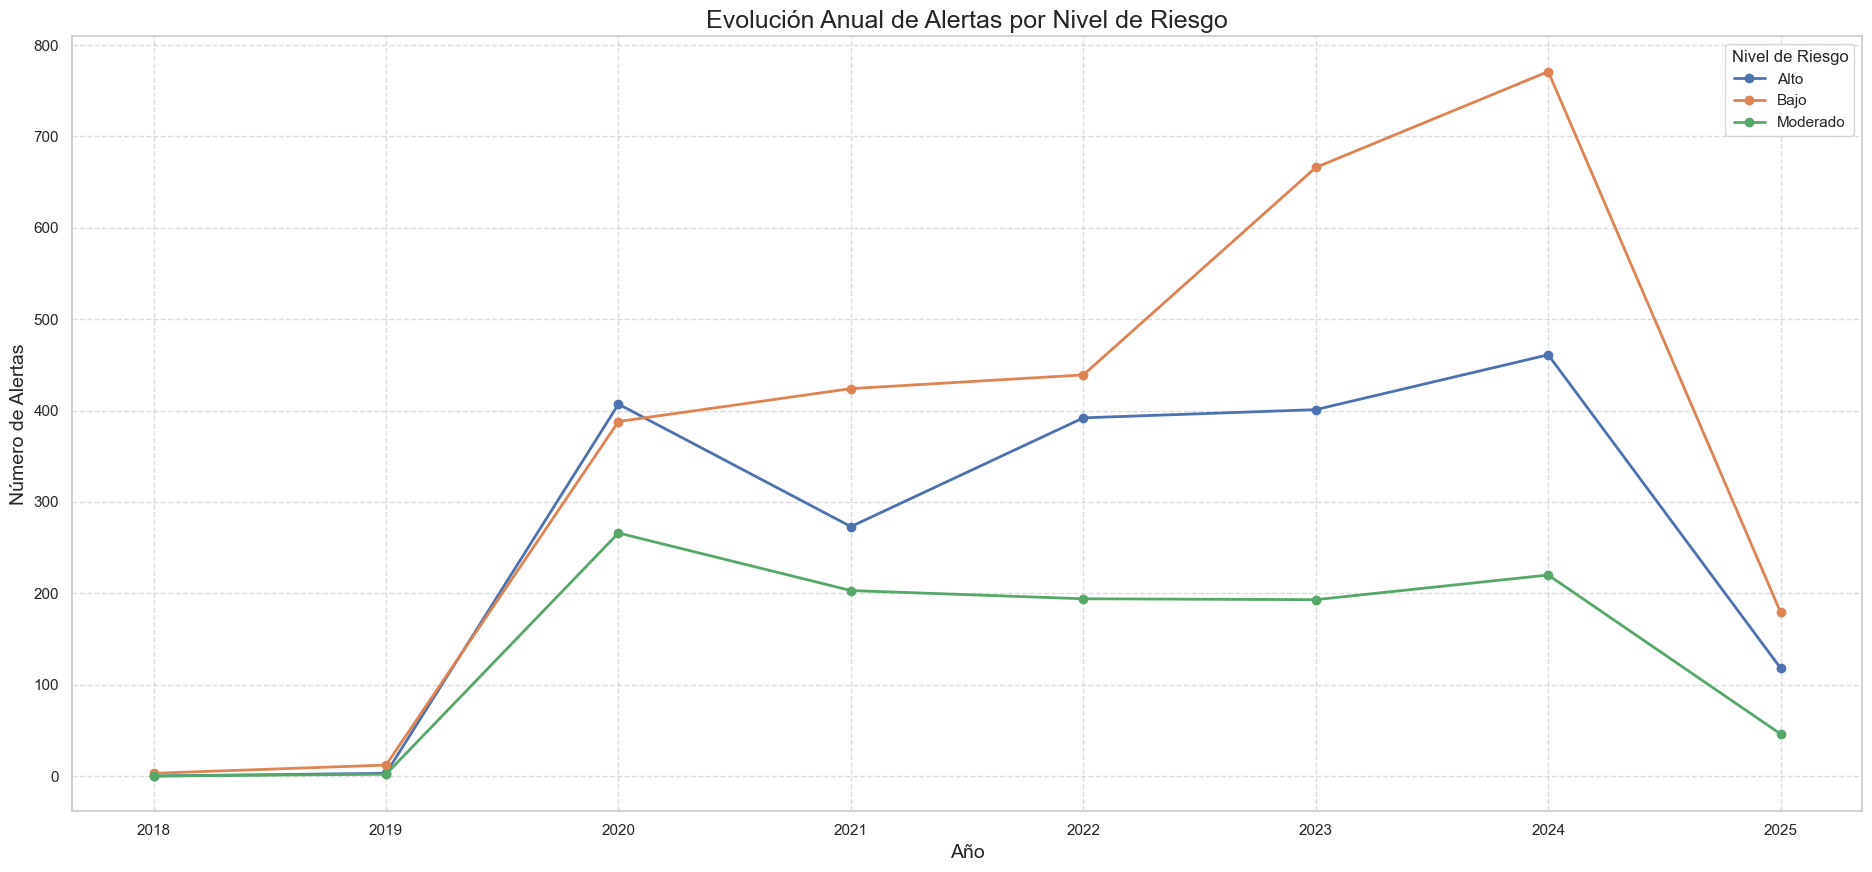

In [ ]:
# 7. Tendencia Temporal de Alertas por Nivel de Riesgo

# Filtrar para tener solo años válidos
df_year_risk = df[df['year'].notna()].copy()

# Crear tabla cruzada de año por nivel de riesgo
year_risk_counts = pd.crosstab(df_year_risk['year'], df_year_risk['nivel_riesgo'])

# Visualizar
plt.figure(figsize=(19, 9))
year_risk_counts.plot(kind='line', marker='o', linewidth=2, ax=plt.gca())
plt.title('Evolución Anual de Alertas por Nivel de Riesgo', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Alertas', fontsize=14)
plt.legend(title='Nivel de Riesgo')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [50]:
# Exportar resultados

# Guardar los resultados principales para futuros informes

# Crear carpeta de resultados si no existe
output_dir = os.path.join('reports', 'risk_analysis')
os.makedirs(output_dir, exist_ok=True)

# Guardar matriz de riesgo
matriz_riesgo.to_csv(os.path.join(output_dir, 'matriz_riesgo.csv'))

# Guardar dataset con clasificaciones
df_classified = df[['alert_id', 'date', 'product_name', 'product_type', 'hazard_type', 
                   'country_origin', 'country_notification', 'category',
                   'severidad', 'probabilidad', 'nivel_riesgo']]
df_classified.to_csv(os.path.join(output_dir, 'alertas_clasificadas.csv'), index=False)

print(f"\nResultados guardados en {output_dir}")


Resultados guardados en reports\risk_analysis


In [51]:
# Resumen Ejecutivo

print("\n" + "="*80)
print("RESUMEN EJECUTIVO: ANÁLISIS DE RIESGOS EN ALERTAS DE PANADERÍA Y LÁCTEOS")
print("="*80)

print(f"\nTotal de alertas analizadas: {len(df)}")

# Distribución por nivel de riesgo
risk_dist = df['nivel_riesgo'].value_counts()
print("\nDistribución por nivel de riesgo:")
for nivel, count in risk_dist.items():
    print(f"- {nivel}: {count} alertas ({count/len(df)*100:.1f}%)")

# Productos/categorías con mayor riesgo
high_risk = df[df['nivel_riesgo'] == 'Alto']
high_risk_cat = high_risk['category'].value_counts().head(3)
print("\nTop 3 categorías con mayor número de alertas de alto riesgo:")
for cat, count in high_risk_cat.items():
    print(f"- {cat}: {count} alertas")

# Principales países de origen con alertas
top_countries = df['country_origin'].value_counts().head(5)
print("\nTop 5 países de origen con más alertas:")
for country, count in top_countries.items():
    print(f"- {country}: {count} alertas")

# Principales peligros
top_hazards_all = df['hazard_type'].dropna().value_counts().head(5)
print("\nTop 5 tipos de peligros más frecuentes:")
for hazard, count in top_hazards_all.items():
    if len(str(hazard)) > 50:
        hazard = str(hazard)[:47] + "..."
    print(f"- {hazard}: {count} alertas")

print("\nRecomendaciones principales:")
print("1. Reforzar controles para detectar Aflatoxinas, especialmente en productos de origen indio y estadounidense")
print("2. Incrementar muestreo para Listeria monocytogenes en lácteos")
print("3. Mejorar sistemas de etiquetado para reducir alertas por alérgenos no declarados")
print("4. Establecer vigilancia reforzada para productos provenientes del Top 5 de países")
print("5. Implementar programa de seguimiento especial para categorías de alto riesgo")

print("\n" + "="*80)


RESUMEN EJECUTIVO: ANÁLISIS DE RIESGOS EN ALERTAS DE PANADERÍA Y LÁCTEOS

Total de alertas analizadas: 6061

Distribución por nivel de riesgo:
- Bajo: 2882 alertas (47.5%)
- Alto: 2055 alertas (33.9%)
- Moderado: 1124 alertas (18.5%)

Top 3 categorías con mayor número de alertas de alto riesgo:
- grains: 1581 alertas
- bakery: 320 alertas
- dairy: 107 alertas

Top 5 países de origen con más alertas:
- United States: 908 alertas
- India: 697 alertas
- France: 325 alertas
- Pakistan: 259 alertas
- Türkiye: 257 alertas

Top 5 tipos de peligros más frecuentes:
- Aflatoxin B1  ,aflatoxin total : 906 alertas
- ethylene oxide  : 429 alertas
- Aflatoxin B1  : 320 alertas
- Listeria monocytogenes : 170 alertas
- Salmonella  enteritidis : 141 alertas

Recomendaciones principales:
1. Reforzar controles para detectar Aflatoxinas, especialmente en productos de origen indio y estadounidense
2. Incrementar muestreo para Listeria monocytogenes en lácteos
3. Mejorar sistemas de etiquetado para reducir